<a href="https://colab.research.google.com/github/bhaddbaeby/Logistic-regression-datmin/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **Nama : Utari W Ardhana**
### **NIM : 2109116103**
### **Kelas C 2021**

## Teori


**Linear Regression**

Linear Regression adalah suatu cara permodelan masalah keterhubungan antara suatu variabel independen terhadap variabel dependen. Contohnya adalah menentukan apakah suatu nilai ukuran tumor tertentu termasuk kedalam tumor ganas atau tidak.

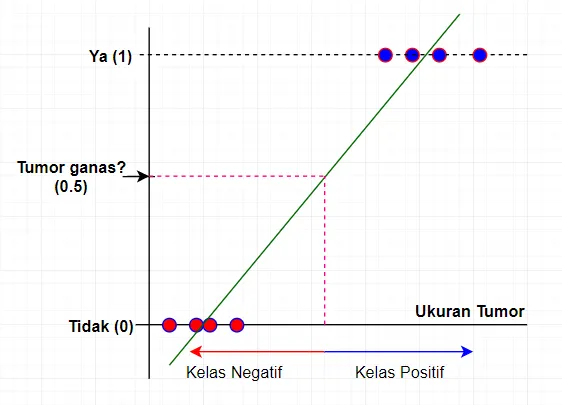

Gambar diatas adalah contoh klasifikasi dengan Linear Regression

[link text](https:// [link text](https://))Dari grafik diatas, terlihat bahwa garis yang dibentuk dari Linear Regression mampu mengklasifikasi masalah tumor dengan baik. Namun, ada masalah yang muncul ketika kita memiliki Outlier Data. Perhatikan gambar berikut:

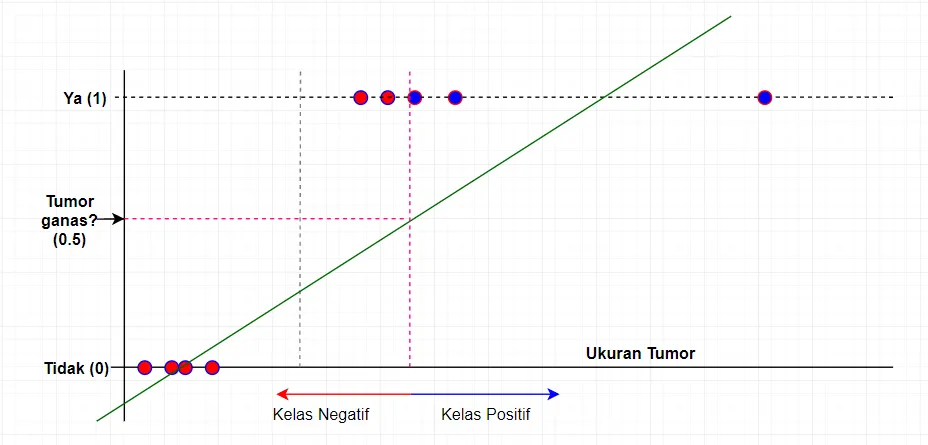

Terlihat bahwa adanya Outlier Data membuat garis Linear Regression tidak lagi mengklasifikasi data dengan baik. 2 Data yang sebelumnya terklasifikasi sebagai Tumor ganas berpindah menjadi Tumor tidak ganas hanya karena 1 data baru.

**Logistic Regression**

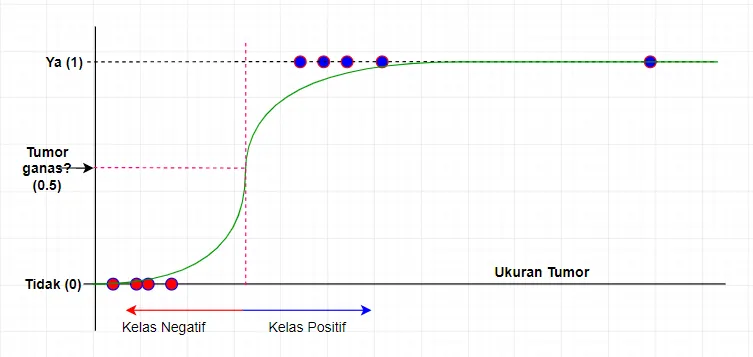

Pada kasus klasifikasi Tumor Ganas, terlihat bahwa tidak terjadi kegagalan klasifikasi terhadap 2 data kelas positif seperti yang terjadi pada model Linear Regression, sehingga dapat disimpulkan untuk kasus klasifikasi ini penggunaan Logistic Regression adalah lebih baik jika dibandingkan dengan Linear Regression, karena mampu menangani Outlier Data.

**Logistic Regression** adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

**Tipe-tipe Logistic Regression**
1. **Binary Logistic Regression** : Adalah Logistic Regression yang hanya memiliki 2 output saja (mengklasifikasi kedalam 2 kelas berbeda). Contoh: Positif-Negatif, Obesitas-Tidak Obesitas.
2. **Multinomial Logistic Regression** : Adalah Logistic Regression yang memiliki 2 output atau lebih (mengklasifikasi kedalam 2 kelas berbeda). Contohnya kelas Sentiment Analysis kalimat positif, negatif, dan netral.
3. **Ordinal Logistic Regression** : Adalah Logistic Regression yang memiliki 2 output atau lebih dengan memperhatikan urutan. (mengklasifikasi kedalam 2 kelas berbeda dengan memperhatikan urutan). Contohnya adalah membagi kelas mahasiswa dalam range Index Prestasi Kumulatif 1.xx, 2.xx, 3.xx, dan 4.00.

 LOGISTIC REGRESSION
> STUDY CASE : SOCIAL NETWORK ADS



#Inisialisasi Library

Inisialisasi Library yang akan digunakan untuk mengolah dataset, training, dan validasi

In [1]:
#inisialisasi library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE

#Persiapan Data

Buka dataset dengan Dataframe Pandas, dan cek seluruh atribut yang ada

Sumber Dataset : https://www.kaggle.com/datasets/dragonheir/logistic-regression?resource=download

In [50]:
#siapkan dataframe untuk mengambil attribut
link_file = "https://raw.githubusercontent.com/bhaddbaeby/Logistic-regression-datmin/main/diabetes2.csv"

In [51]:
# Untuk mengkoneksikan suatu data dari dalam file csv
df = pd.read_csv(link_file,header=None)

In [52]:
df

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [57]:
#masukan attribut kedalam array 
attrs = []
for attr in range(8):
    attrs.append(df.at[0,attr])

attrs.append('target')
attrs

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'target']

Buat Dataframe baru dengan mengganti kolom utama dengan attribut yang didapat dari proses sebelumnya

In [58]:
#dataframe baru dengan nama kolom = attrs
dfnew = pd.read_csv("https://raw.githubusercontent.com/bhaddbaeby/Logistic-regression-datmin/main/diabetes2.csv",header=None)
dfnew = df.iloc[1:]
dfnew.drop(dfnew.index[[0,1]])
dfnew.columns = attrs
dfnew.index =  range(len(dfnew.index))
print(dfnew.info())
print(dfnew.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    object
 1   Glucose                   768 non-null    object
 2   BloodPressure             768 non-null    object
 3   SkinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    object
 8   target                    768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB
None
       Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI  \
count          768     768           768           768     768  768   
unique          17     136            47            51     186  248   
top              1      99            70   

In [59]:
#dataframe yang dibentuk
dfnew.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0,0.232,54,1


#Handling Missing Value

<Axes: >

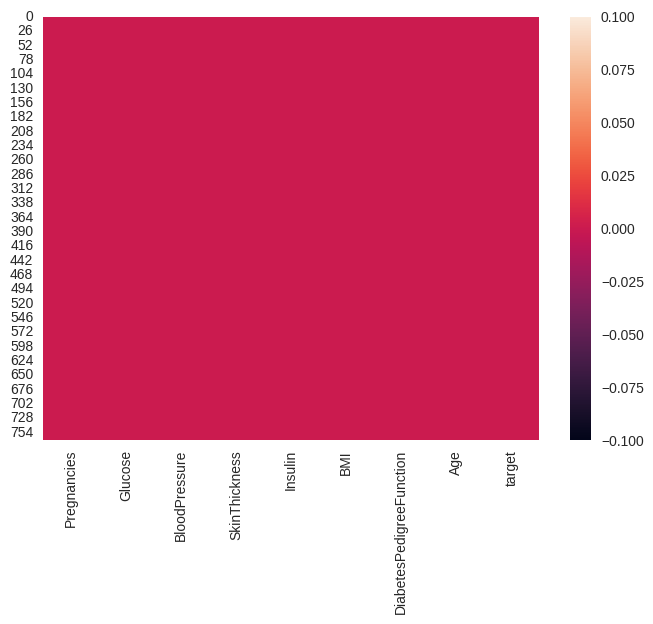

In [60]:
#cek apakah ada data yang hilang
missing_values = dfnew.isnull()
missing_values

sns.heatmap(data = missing_values)

0    500
1    268
Name: target, dtype: int64

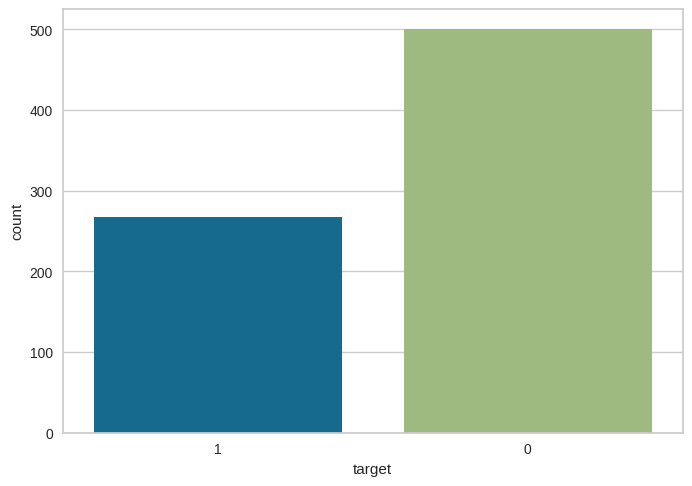

In [61]:
#melihat perbandingan jumlah kelas label 1 dan 0
sns.countplot(x='target', data=dfnew)
dfnew.target.value_counts()

#Feature Selection

In [64]:
#prepare train-test data
feature = attrs
feature.pop(0)
feature.pop(4)
feature

['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'target']

In [65]:
features = dfnew[feature]
label = dfnew['target']

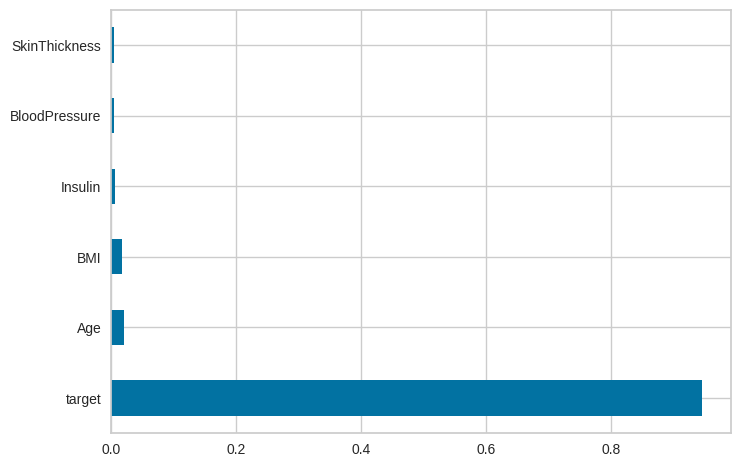

In [66]:
model = ExtraTreesClassifier()
model.fit(features,label)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')
feat_importances = feat_importances.sort_values(ascending=False) # mengurutkan fitur dari yang paling importance
plt.show()

In [67]:
cnt=0
for i in feat_importances :
  if (i > 0.002) : cnt = cnt+1 # mengambil fitur dengan tingkat importance diatas 0.002
print(cnt)

6


In [68]:
selected_features = feat_importances.index.tolist()[:cnt]
selected_features

['target', 'Age', 'BMI', 'Insulin', 'BloodPressure', 'SkinThickness']

In [69]:
features = dfnew[selected_features]
label = dfnew['target']

#SMOTE

SMOTE digunakan untuk imbalance data

In [70]:
sm = SMOTE(random_state=2)
features, label = sm.fit_resample(features, label.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(label=='1')))
print("After OverSampling, counts of label '0': {}".format(sum(label=='0')))

After OverSampling, counts of label '1': 500
After OverSampling, counts of label '0': 500


#Normalisasi Data

Menyiapkan data training dan testing dan normalisasikan data tersebut

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=101)

In [72]:
#Normalisasi
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression

Bentuk model Logistic Regression, kemudian lihat skor hasil 5-fold cross validation dan Testing

In [73]:
#train the model and look at test score
logmodel = LogisticRegression()

score =  cross_val_score(logmodel, features, label, cv=5)
print("CROSS VALIDATION SCORE : ",statistics.mean(score))

logmodel.fit(X_train, y_train)
print("SCORE : ",logmodel.score(X_test, y_test))

CROSS VALIDATION SCORE :  1.0
SCORE :  1.0


#Evaluation

Bentuk tabel dan heatmap hasil evaluasi model

              precision    recall  f1-score   support

  no disease       1.00      1.00      1.00        91
     disease       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


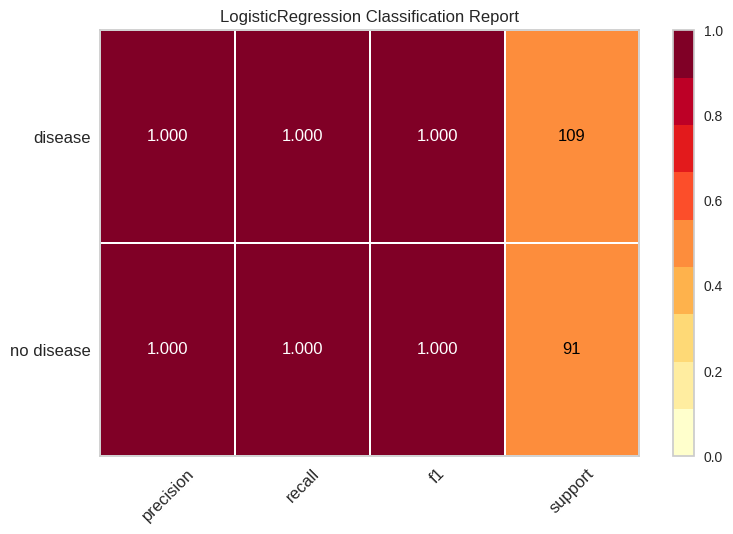

In [74]:
#evaluate the model
classes = ['no disease','disease']
y_pred = logmodel.predict(X_test)
print(classification_report(y_test, y_pred, target_names=classes))

visualizer = ClassificationReport(logmodel, classes=classes, support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Confusion Matrix

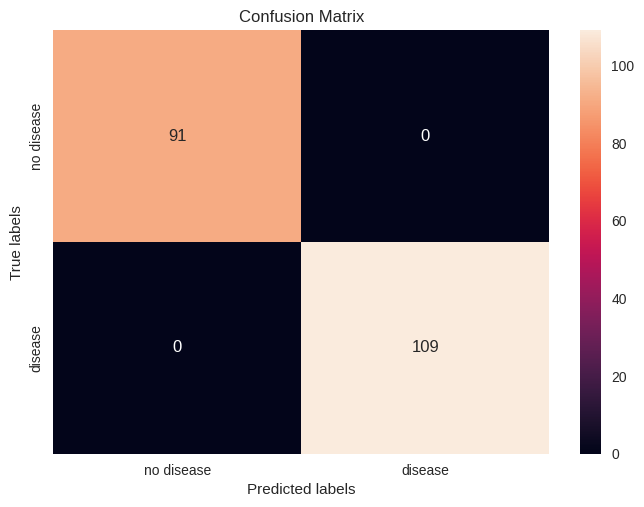

In [75]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g') #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)
plt.show()